https://leetcode.com/problems/binary-search-tree-to-greater-sum-tree/

In [12]:
from jupyterthemes import jtplot
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
import matplotlib

jtplot.style('gruvboxd')
matplotlib.use('nbagg')

import numpy as np


class TreeNode:
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None
        
        
def arr_to_bst(nums):
    
    if not len(nums): return
    nums = sorted(nums)
    n = len(nums)
    k = n // 2
    
    root = TreeNode(nums[k])
    root.left = arr_to_bst(nums[:k]) if k > 0 else None
    root.right = arr_to_bst(nums[k+1:]) if k+1 < n else None
        
    return root


def plot_bst(root, depth=0, ax=None):
    
    if not root:
        return ax
    
    if not ax:
        fig, ax = plt.subplots()
        ax.invert_yaxis()
    
    if root.left:
        ax.plot([root.val, root.left.val], [depth, depth+1], 'o-', c='b')
        plot_bst(root.left, depth+1, ax)
    
    if root.right:
        ax.plot([root.val, root.right.val], [depth, depth+1], 'o-', c='b')
        plot_bst(root.right, depth+1, ax)
        
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.annotate(root.val, (root.val, depth-0.05))
    
    return ax

<IPython.core.display.Javascript object>


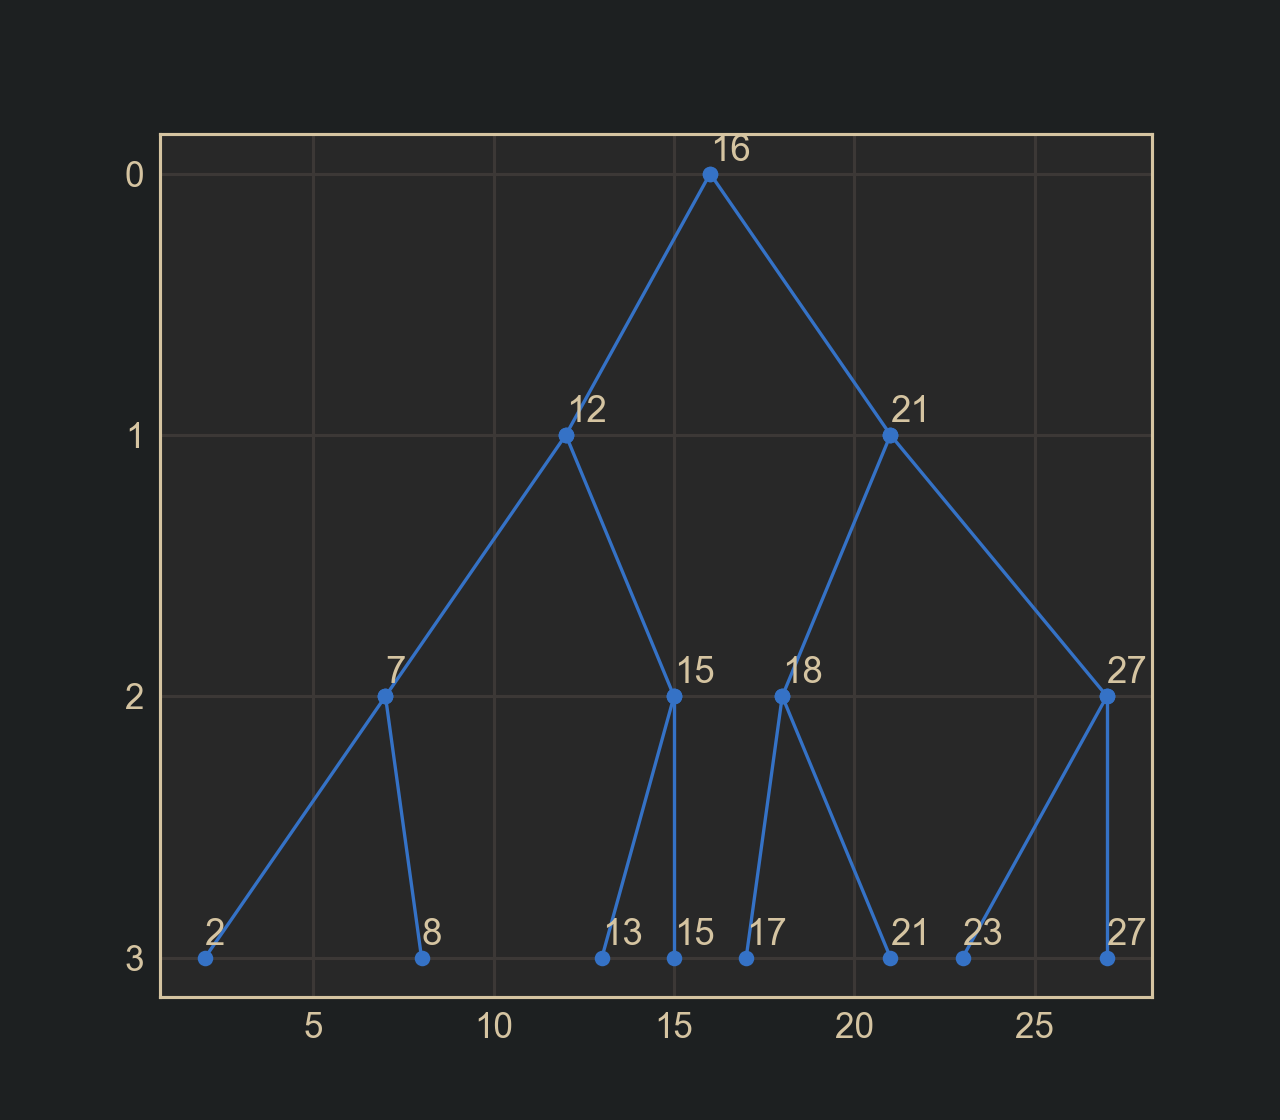

In [19]:
%matplotlib notebook

nums = np.random.randint(30, size=15)
root = arr_to_bst(nums)
ax = plot_bst(root)

# Solution

In [82]:
class Solution:
    
    def addVal(self, root, val=0):
        
        if not root:
            return None
        
        root.val = root.val + val
        root.left = self.addVal(root.left, val)
        root.right = self.addVal(root.right, val)
        
        return root
    
    
    def getGstMax(self, root):
        
        if not root:
            return 0
        
        while root.left:
            root = root.left
        return root.val
            
        
    def bstToGst(self, root):
        
        if not root: 
            return None
        
        root.right = self.bstToGst(root.right)
        root.val = self.getGstMax(root.right) + root.val
        
        root.left = self.bstToGst(root.left)
        root.left = self.addVal(root.left, root.val)
            
        return root

<IPython.core.display.Javascript object>


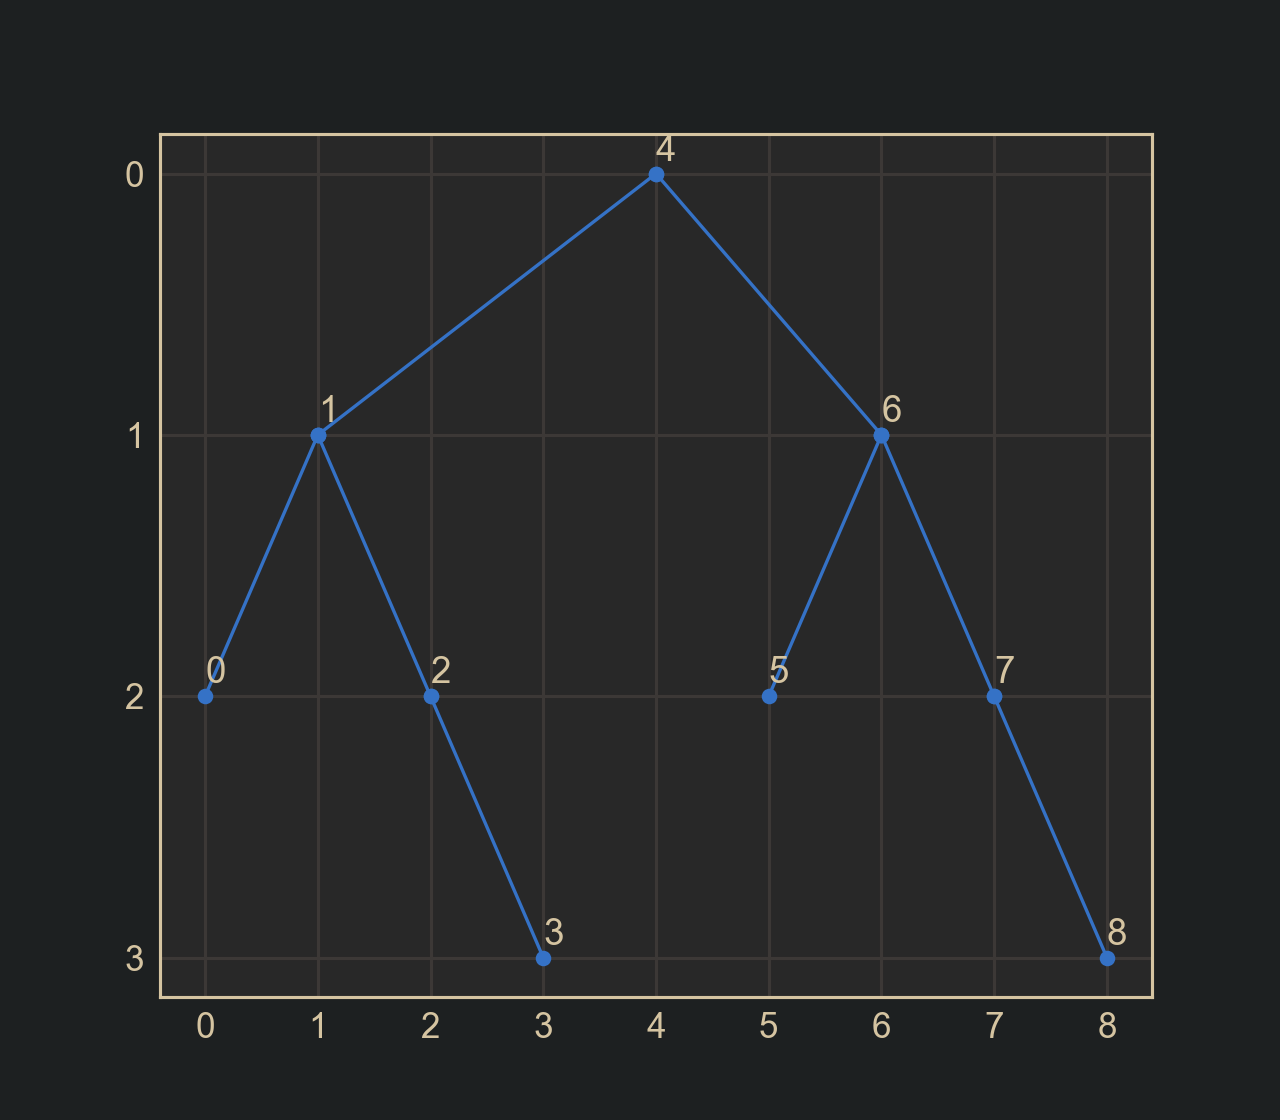

<IPython.core.display.Javascript object>


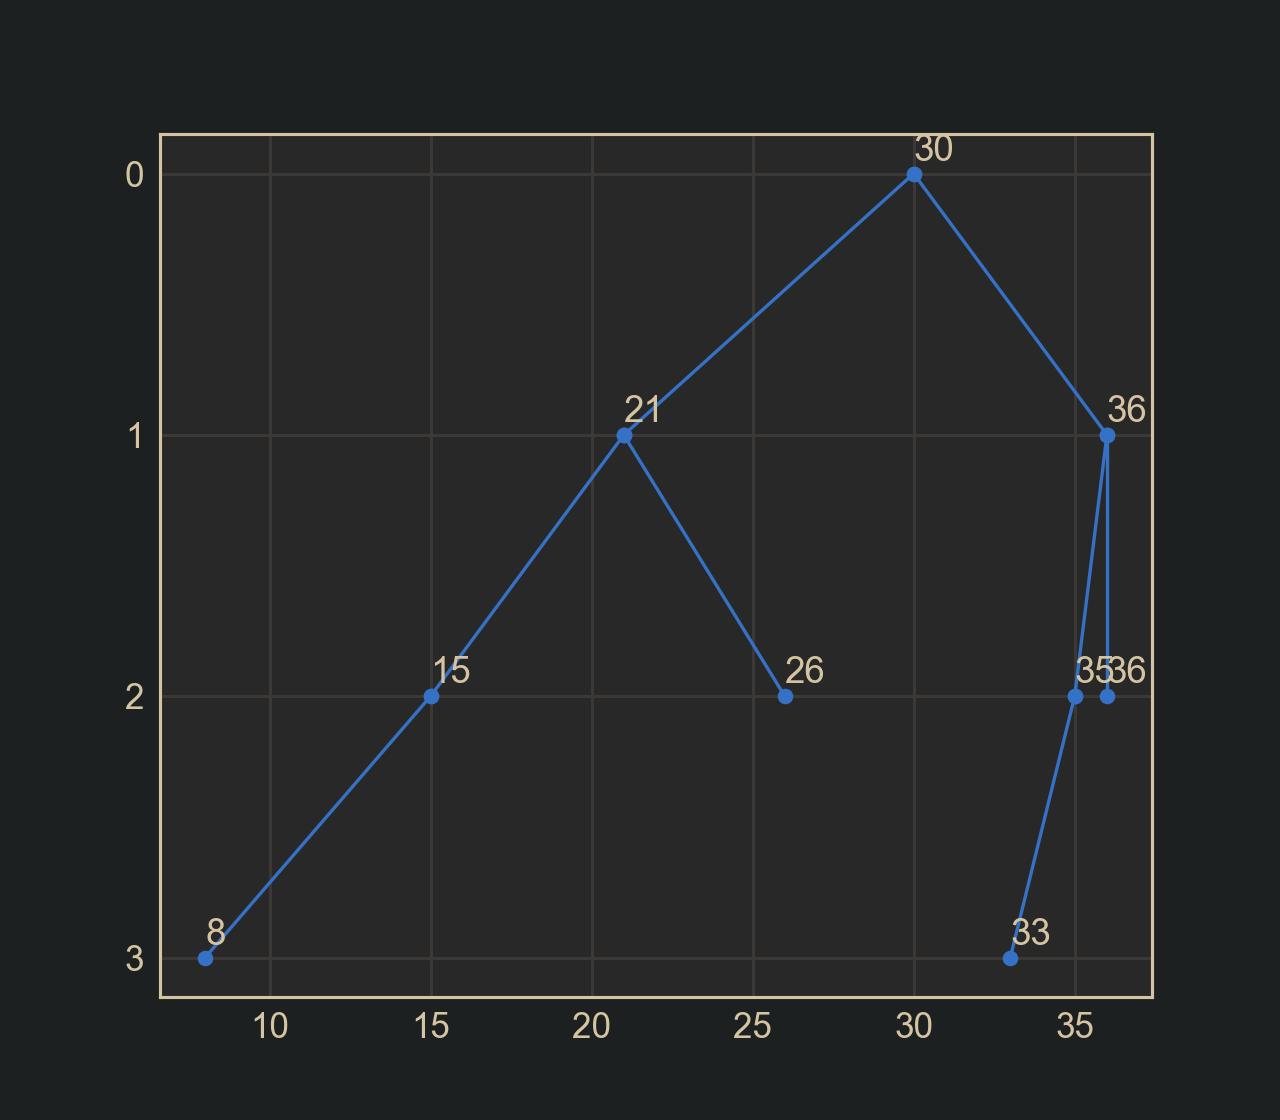

In [83]:
%matplotlib notebook

root = TreeNode(4)
root.left = TreeNode(1)
root.left.left = TreeNode(0)
root.left.right = TreeNode(2)
root.left.right.right = TreeNode(3)
root.right = TreeNode(6)
root.right.left = TreeNode(5)
root.right.right = TreeNode(7)
root.right.right.right = TreeNode(8)

#nums = np.random.randint(4, size=15)
#nums = [4,1,6,0,2,5,7,3,8]
#root = arr_to_bst([4,1,6,0,2,5,7,null,null,null,3,null,null,null,8])
ax = plot_bst(root)

root = Solution().bstToGst(root)
ax = plot_bst(root)

<IPython.core.display.Javascript object>


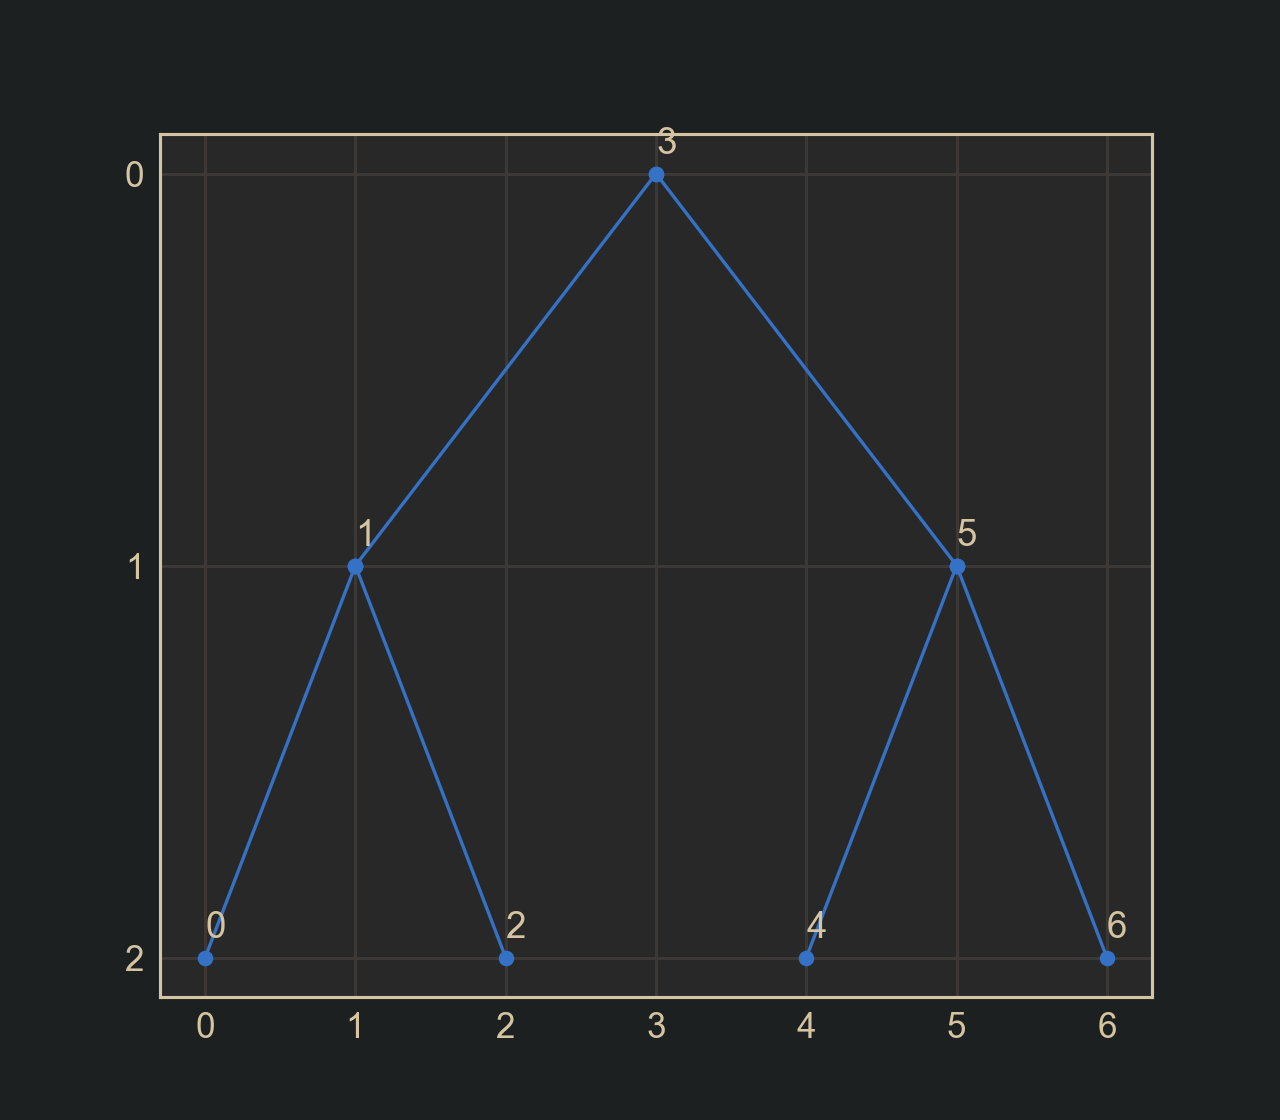

In [112]:
%matplotlib notebook

nums = [0, 1, 2, 3, 4, 5, 6]
root = Solution().sortedArrayToBST(nums)
ax = plot_bst(root)

In [113]:
%matplotlib notebook

nums = []
root = Solution().sortedArrayToBST(nums)
ax = plot_bst(root)